<a href="https://colab.research.google.com/github/ni-ms/colab-projects/blob/CNN/CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train.shape

(60000, 28, 28)

In [ ]:
# Cnn expects 3d input for convolution. Add a supurfluous 1d
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
x_train.shape

(60000, 28, 28, 1)

In [ ]:
K = len(set(y_train))
K

10

In [ ]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# We are increasing the number of feature maps for each layer
# The init and call methods are implemented in python for the (i) thing
x = Conv2D(32, (3,3), strides= 2, activation='relu')(i)
x = Conv2D(64, (3,3), strides= 2, activation='relu')(x)
x = Conv2D(128, (3,3), strides= 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)
# First argument is a list of inputs or a single input
# Second argument is a list of outputs or a single output
model = Model(i,x)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 33s 17ms/step - loss: 0.5321 - accuracy: 0.8031 - val_loss: 0.3992 - val_accuracy: 0.8505
Epoch 2/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3677 - accuracy: 0.8608 - val_loss: 0.3697 - val_accuracy: 0.8587
Epoch 3/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3143 - accuracy: 0.8815 - val_loss: 0.3256 - val_accuracy: 0.8774
Epoch 4/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2838 - accuracy: 0.8924 - val_loss: 0.3105 - val_accuracy: 0.8863
Epoch 5/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2566 - accuracy: 0.9035 - val_loss: 0.2886 - val_accuracy: 0.8954
Epoch 6/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2372 - accuracy: 0.9103 - val_loss: 0.2973 - val_accuracy: 0.8945
Epoch 7/15
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2179 - accuracy: 0.9173 - val_loss: 0.2886 -

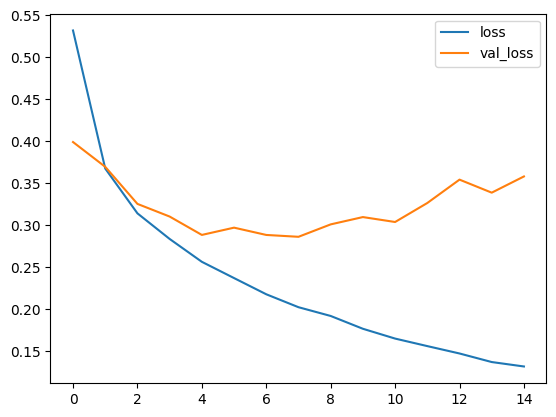

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


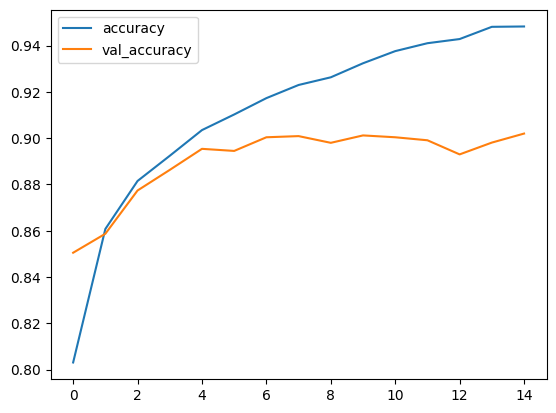

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
#If val l


313/313 [==============================] - 3s 9ms/step
confusion matrix without normalization
[[885   0  19  11   1   1  81   0   2   0]
 [  5 977   1  12   2   0   1   0   2   0]
 [ 25   0 870  16  42   0  46   0   1   0]
 [ 17  15  13 912  25   0  17   0   1   0]
 [  0   1  73  27 839   1  58   0   1   0]
 [  1   0   0   1   0 972   0  16   4   6]
 [127   2  70  24 107   0 665   0   5   0]
 [  0   0   0   0   0   8   0 972   0  20]
 [  3   1   3   4   4   1   9   2 973   0]
 [  0   0   0   0   0   7   1  37   0 955]]


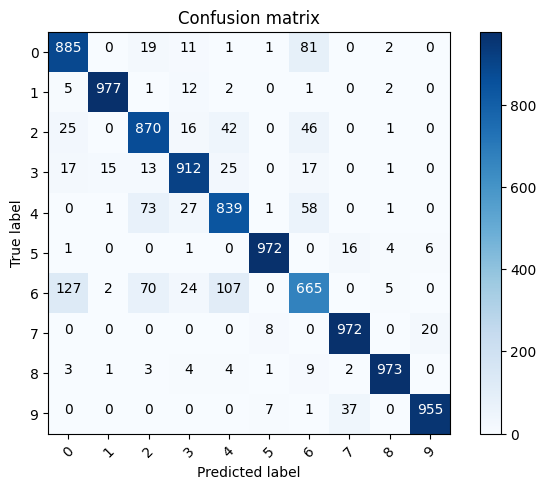

In [ ]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap = plt.cm.Blues):
  """
  This function prints and plots the confusion matrix
  Normalization can be applied by setting normalize=True
  """
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("confusion matrix without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black"
             )
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


In [ ]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot'''.split()

Text(0.5, 1.0, 'True label: Shirt Predicted: Pullover')

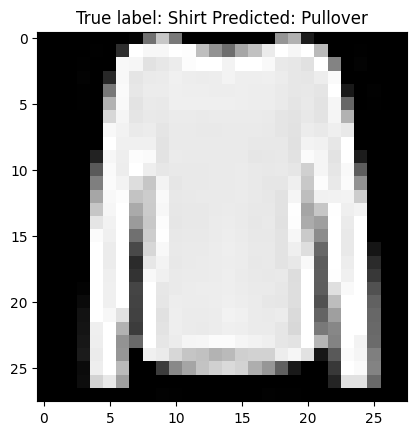

In [ ]:
# Show misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title("True label: %s Predicted: %s"%(labels[y_test[i]],labels[p_test[i]]))